# Company Credit Risk Analysis

In [34]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)

import warnings
warnings.filterwarnings("ignore")

In [35]:
d = pd.read_csv(r"C:\Users\LOKI\Downloads\Comp_Fin_Data.csv")

In [36]:
d.head()

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
0,1,395.30,827.60,336.50,534.10,13.50,508.70,38.90,124.40,64.60,...,5.65,3.99,3.37,14.87,8760056.00,10.00,4.44,4.44,827.60,NaN
1,2,36.20,67.70,24.30,137.90,-3.70,131.00,3.20,5.50,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.70,NaN
2,3,84.00,238.40,78.90,331.20,-18.10,309.20,3.90,25.80,10.50,...,2.51,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.40,NaN
3,4,2041.40,6883.50,1443.30,8448.50,212.20,8482.40,178.30,418.40,185.10,...,1.91,18.14,18.62,11.11,10000000.00,10.00,17.60,17.60,6883.50,NaN
4,5,41.80,90.90,47.00,388.60,3.40,392.70,-0.70,7.20,-0.60,...,68.00,45.87,28.67,19.93,107315.00,100.00,-6.52,-6.52,90.90,NaN


In [37]:
d.shape

(4256, 51)

In [38]:
d.columns = d.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_')

In [39]:
d.head()

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
0,1,395.30,827.60,336.50,534.10,13.50,508.70,38.90,124.40,64.60,...,5.65,3.99,3.37,14.87,8760056.00,10.00,4.44,4.44,827.60,NaN
1,2,36.20,67.70,24.30,137.90,-3.70,131.00,3.20,5.50,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.70,NaN
2,3,84.00,238.40,78.90,331.20,-18.10,309.20,3.90,25.80,10.50,...,2.51,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.40,NaN
3,4,2041.40,6883.50,1443.30,8448.50,212.20,8482.40,178.30,418.40,185.10,...,1.91,18.14,18.62,11.11,10000000.00,10.00,17.60,17.60,6883.50,NaN
4,5,41.80,90.90,47.00,388.60,3.40,392.70,-0.70,7.20,-0.60,...,68.00,45.87,28.67,19.93,107315.00,100.00,-6.52,-6.52,90.90,NaN


In [40]:
print('The number of rows (observations) is',d.shape[0],'\n''The number of columns (variables) is',d.shape[1])

The number of rows (observations) is 4256 
The number of columns (variables) is 51


In [41]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Num                                             4256 non-null   int64  
 1   Networth_Next_Year                              4256 non-null   float64
 2   Total_assets                                    4256 non-null   float64
 3   Net_worth                                       4256 non-null   float64
 4   Total_income                                    4025 non-null   float64
 5   Change_in_stock                                 3706 non-null   float64
 6   Total_expenses                                  4091 non-null   float64
 7   Profit_after_tax                                4102 non-null   float64
 8   PBDITA                                          4102 non-null   float64
 9   PBT                                      

In [42]:
pd.options.display.float_format = '{:.2f}'.format   

d.describe().T

,count,mean,std,min,25%,50%,75%,max
Num,4256.00,2128.50,1228.75,1.00,1064.75,2128.50,3192.25,4256.00
Networth_Next_Year,4256.00,1344.74,15936.74,-74265.60,3.98,72.10,330.82,805773.40
Total_assets,4256.00,3573.62,30074.44,0.10,91.30,315.50,1120.80,1176509.20
Net_worth,4256.00,1351.95,12961.31,0.00,31.48,104.80,389.85,613151.60
Total_income,4025.00,4688.19,53918.95,0.00,107.10,455.10,1485.00,2442828.20
Change_in_stock,3706.00,43.70,436.92,-3029.40,-1.80,1.60,18.40,14185.50
Total_expenses,4091.00,4356.30,51398.09,-0.10,96.80,426.80,1395.70,2366035.30
Profit_after_tax,4102.00,295.05,3079.90,-3908.30,0.50,9.00,53.30,119439.10
PBDITA,4102.00,605.94,5646.23,-440.70,6.93,36.90,158.70,208576.50
PBT,4102.00,410.26,4217.42,-3894.80,0.80,12.60,74.17,145292.60


#### Creating a binary target variable using 'Networth_Next_Year'

In [43]:
d['default'] = np.where((d['Networth_Next_Year'] > 0), 0, 1)

In [44]:
d[['default','Networth_Next_Year']].head(10)

,default,Networth_Next_Year
0,0,395.30
1,0,36.20
2,0,84.00
3,0,2041.40
4,0,41.80
5,0,291.50
6,0,93.30
7,0,985.10
8,0,188.60
9,0,229.60


In [45]:
d['default'].value_counts()

default
0    3352
1     904
Name: count, dtype: int64

In [46]:
d['default'].value_counts(normalize = True)

default
0   0.79
1   0.21
Name: proportion, dtype: float64

## Exploratory Data Analysis

### Univariate Analysis

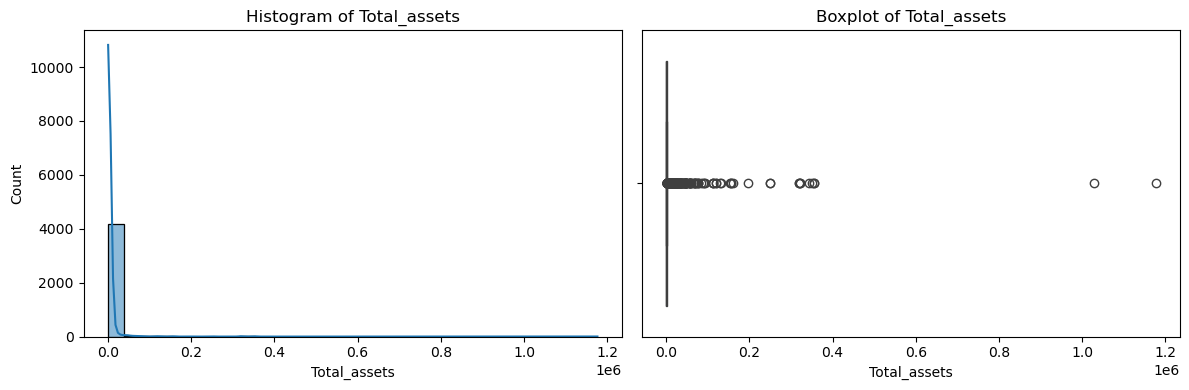

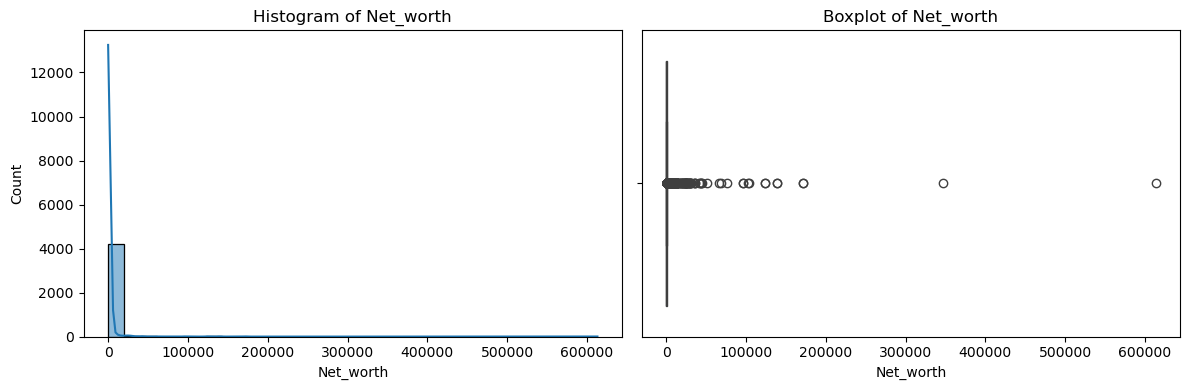

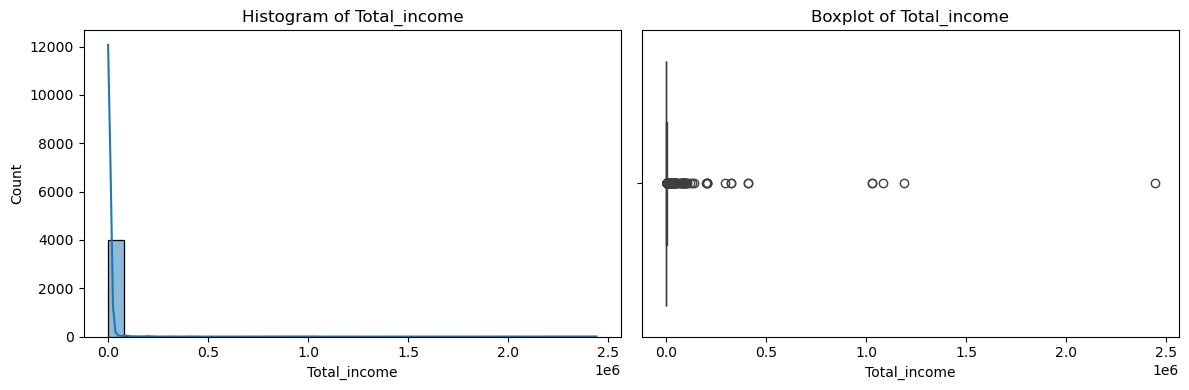

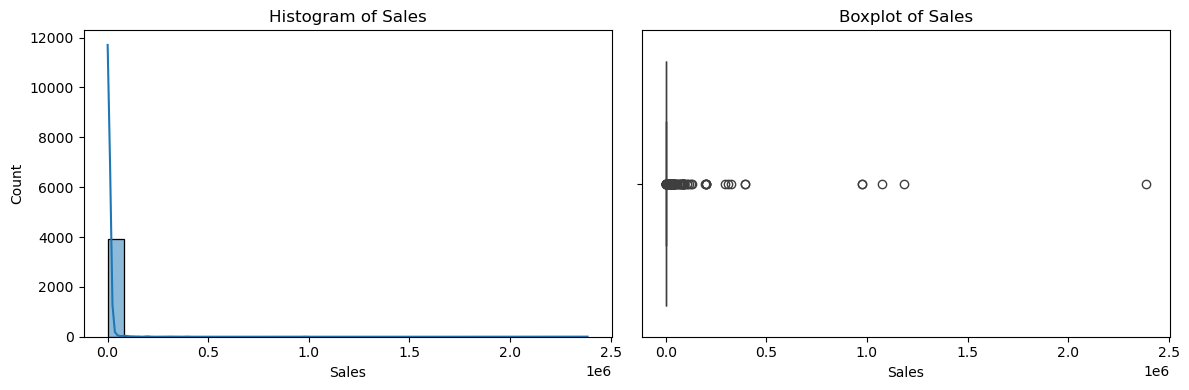

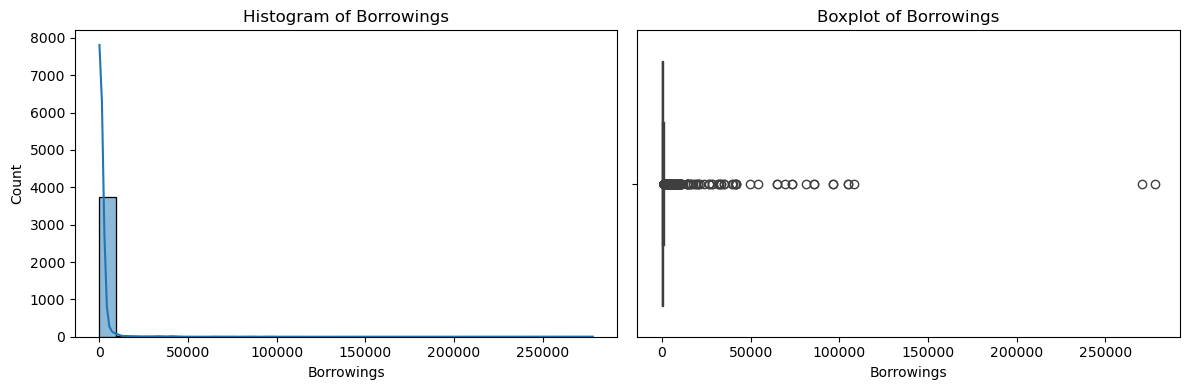

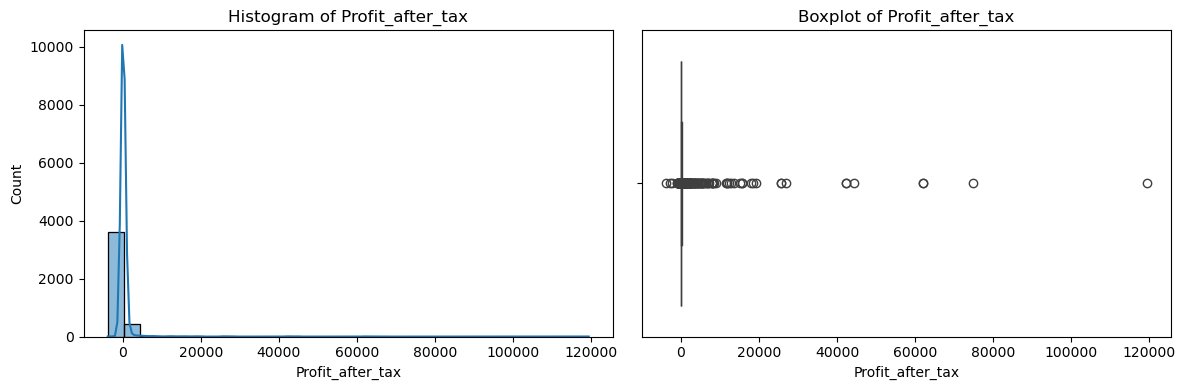

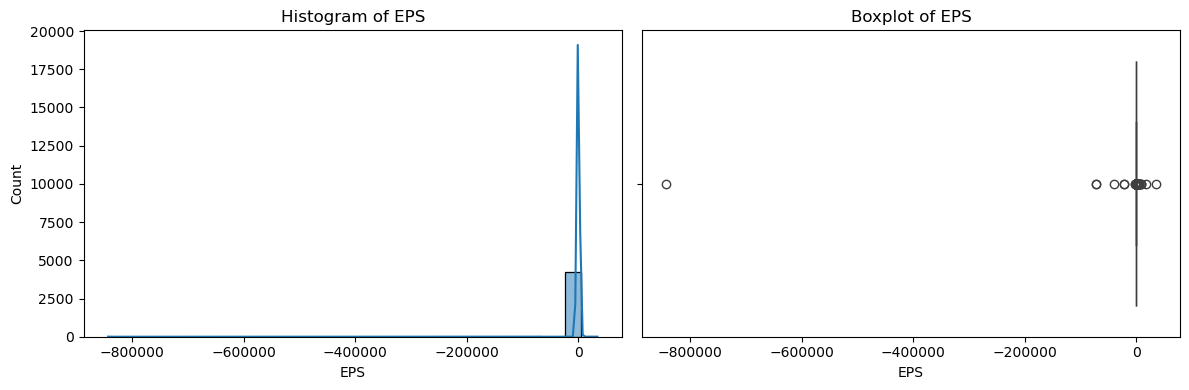

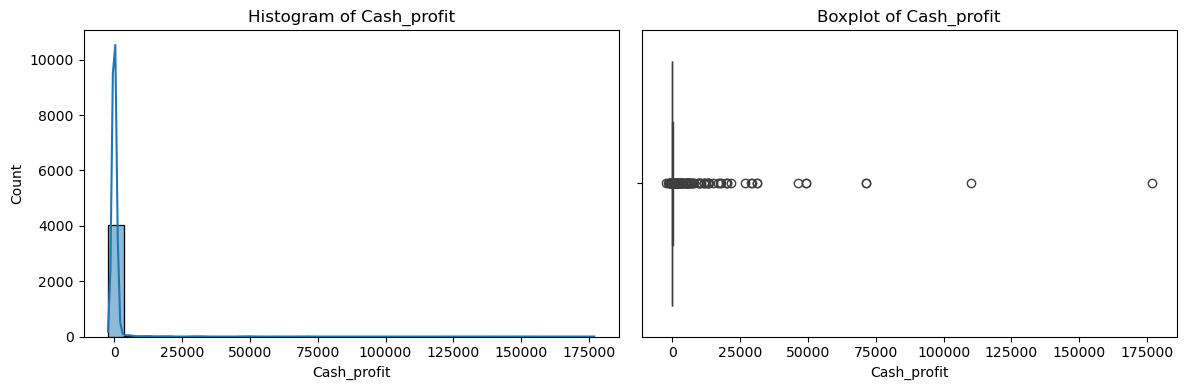

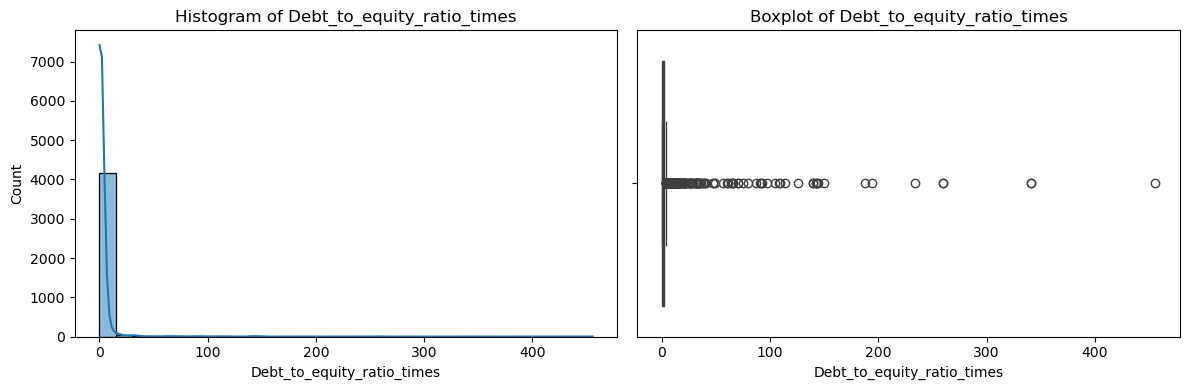

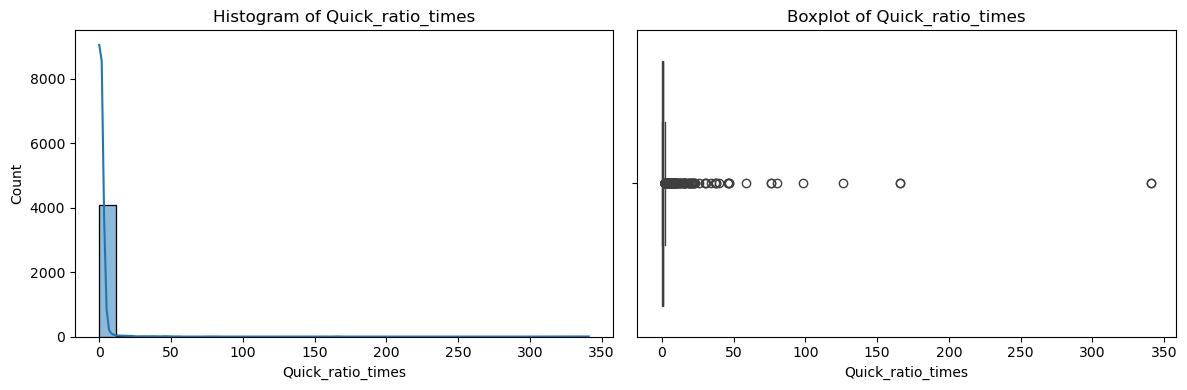

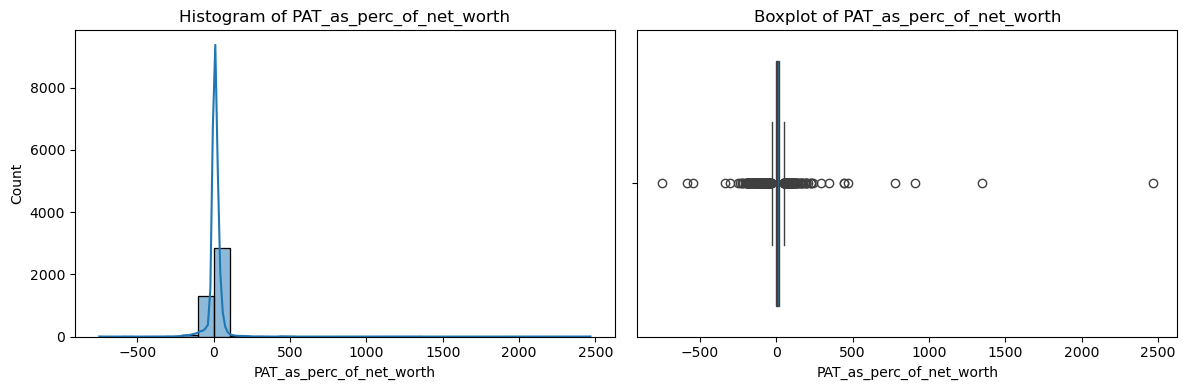

In [47]:
univariate_features = [
    'Total_assets', 'Net_worth', 'Total_income', 'Sales', 'Borrowings',
    'Profit_after_tax', 'EPS', 'Cash_profit', 'Debt_to_equity_ratio_times',
    'Quick_ratio_times', 'PAT_as_perc_of_net_worth'
]

# Plot histograms and boxplots
for feature in univariate_features:
    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(d[feature], kde=True, bins=30)
    plt.title(f'Histogram of {feature}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=d[feature])
    plt.title(f'Boxplot of {feature}')

    plt.tight_layout()
    plt.show()

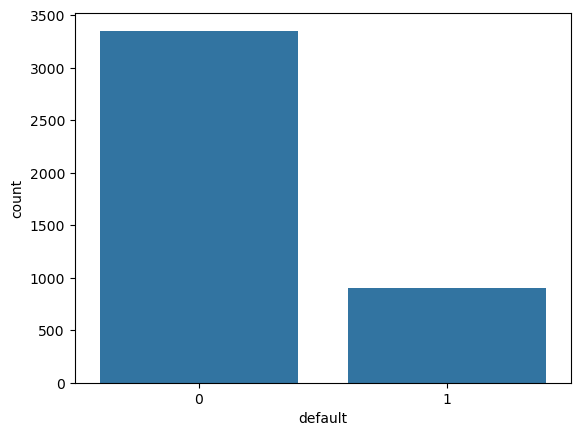

In [48]:
sns.countplot(d, x="default");

### Bivariate Analysis

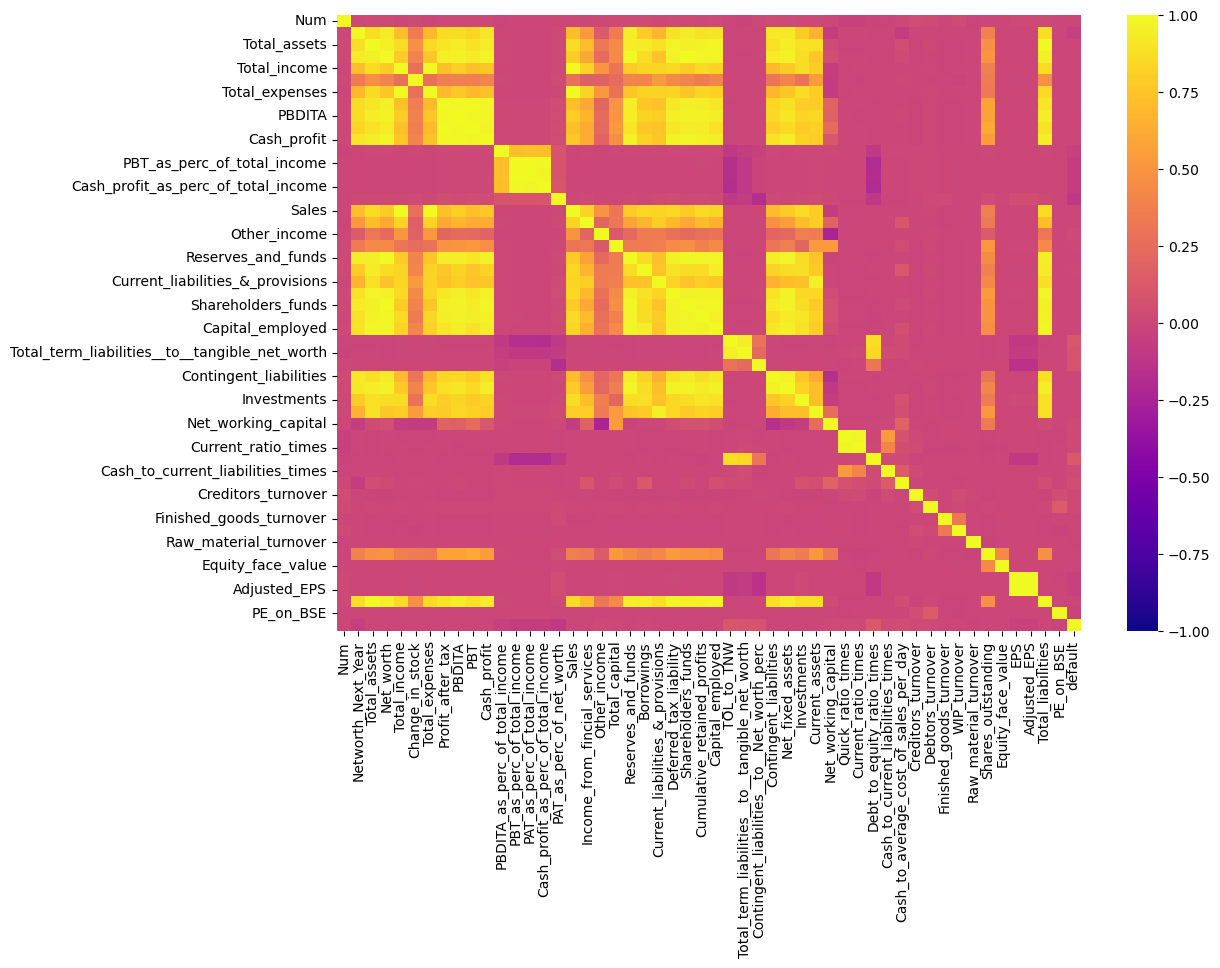

In [49]:
plt.figure(figsize = (12,8))
cor_matrix = d.corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1);

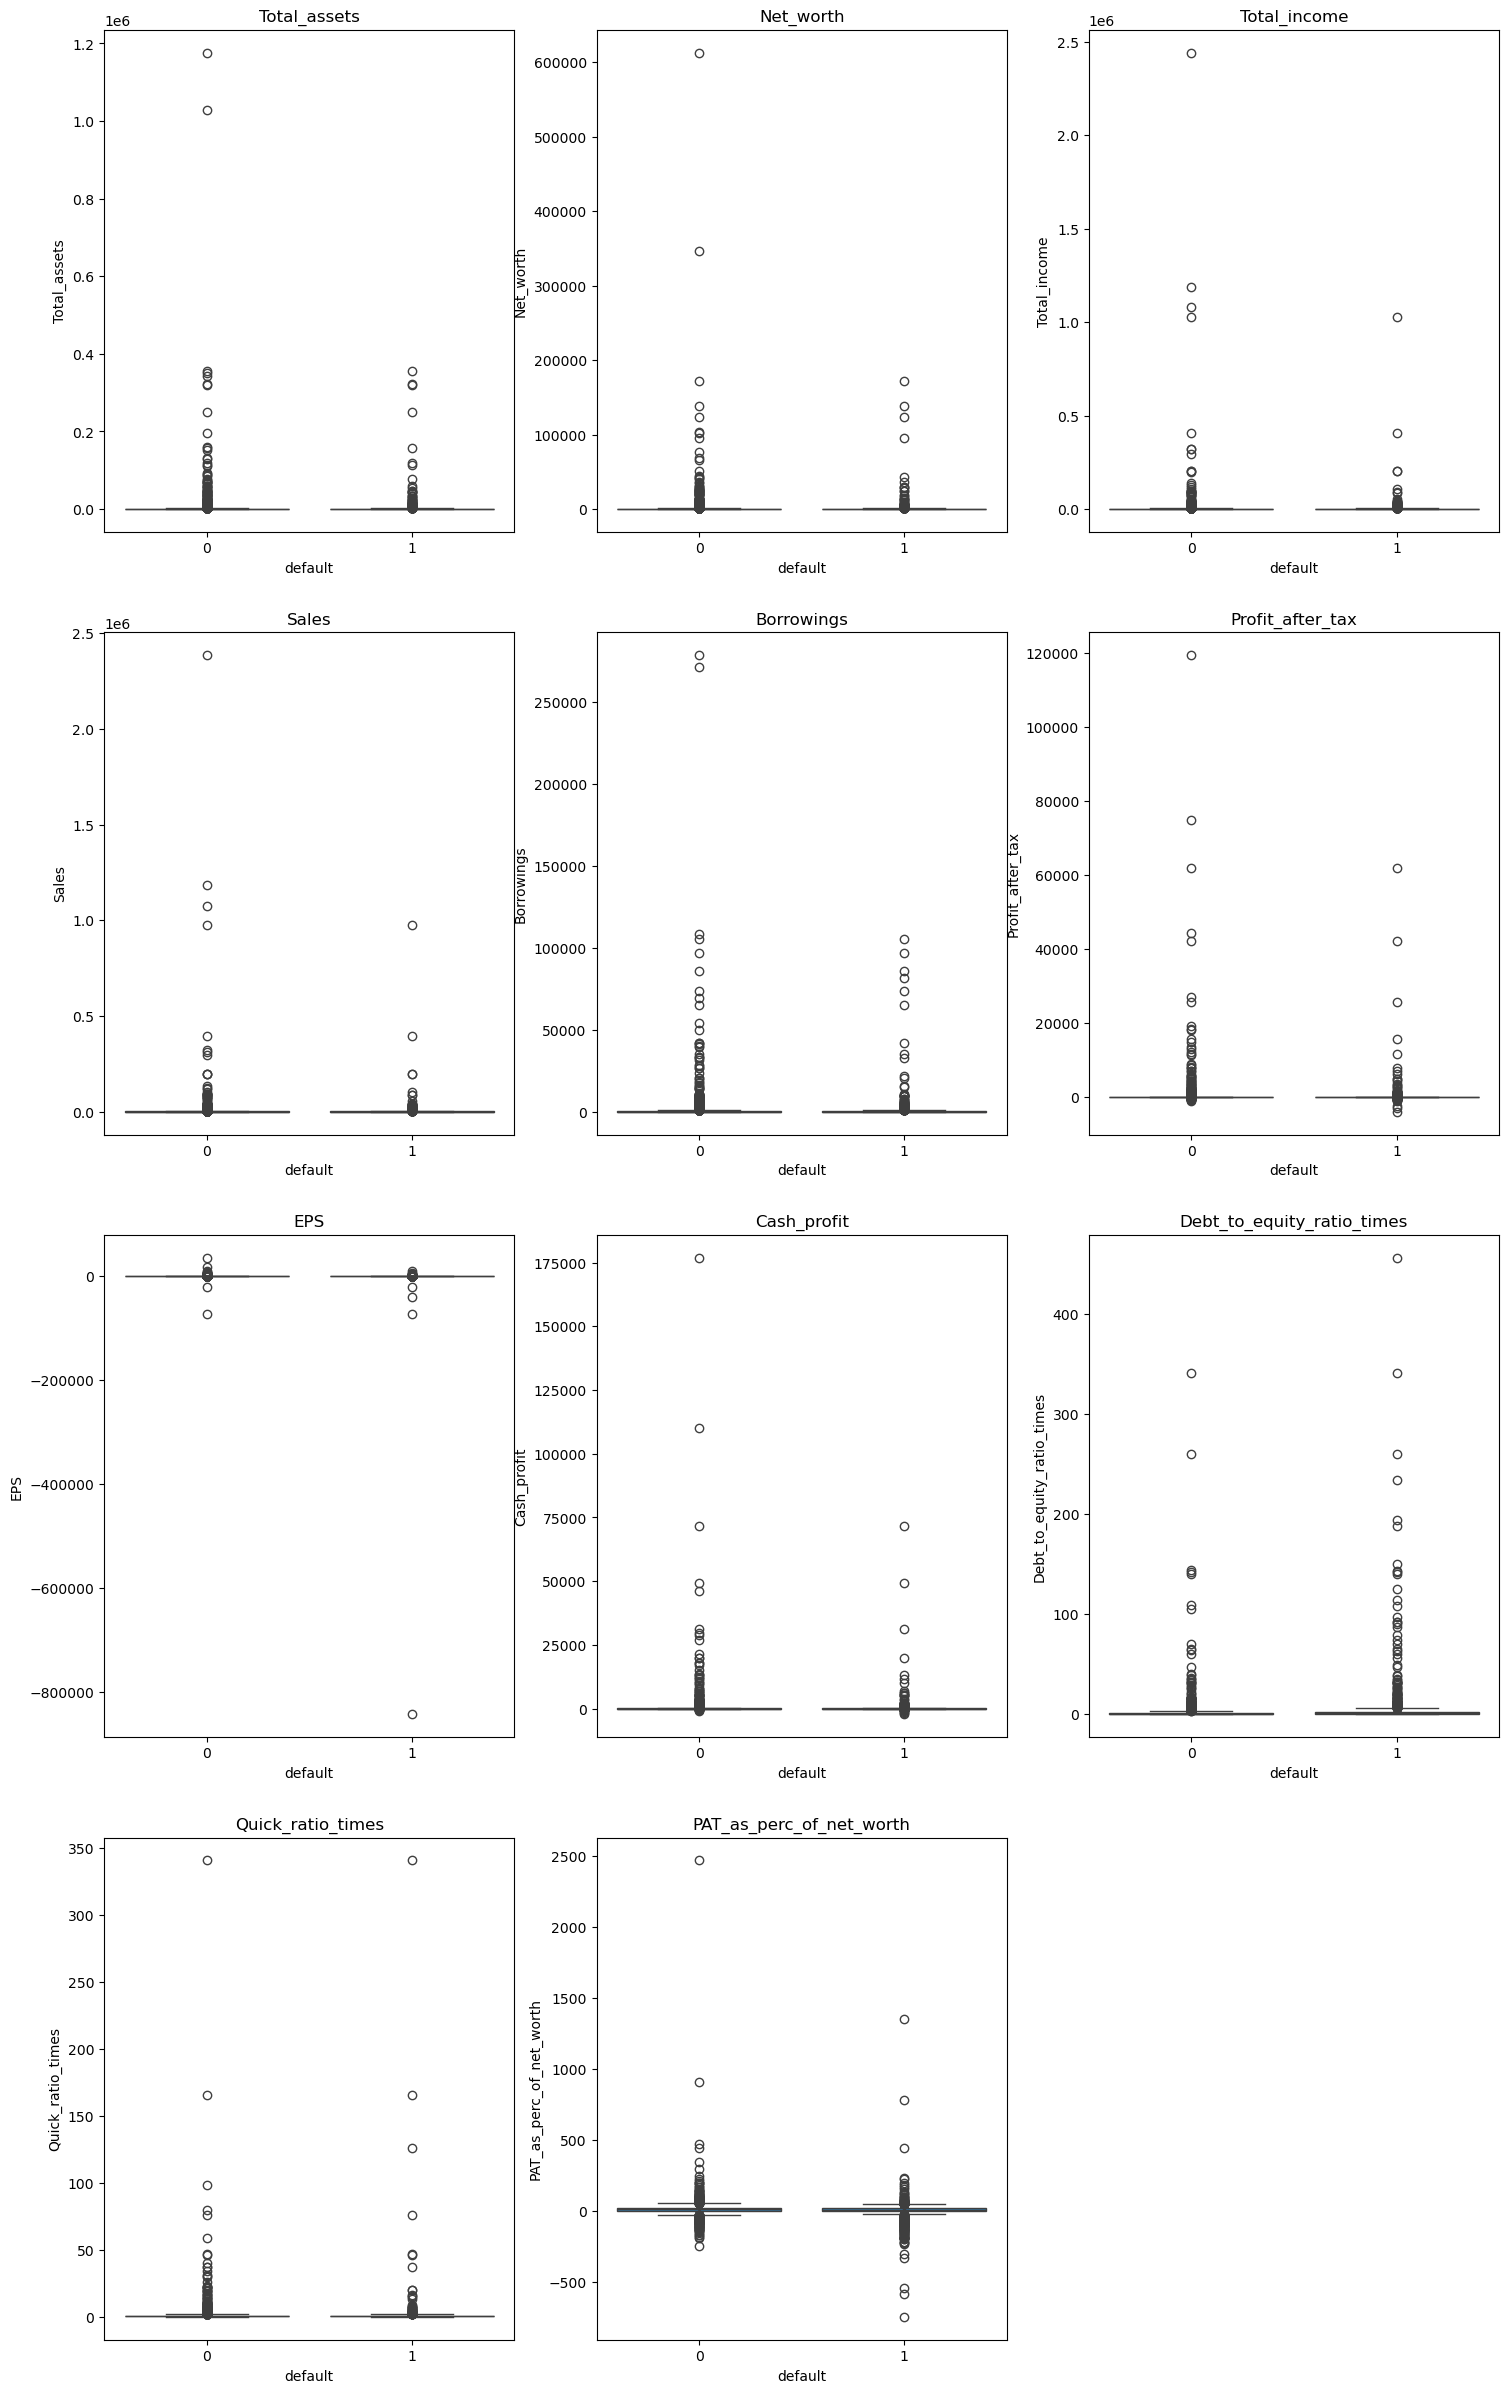

In [50]:
#Get boxplots for all the numerical columns
numeric_columns = [
    'Total_assets', 'Net_worth', 'Total_income', 'Sales', 'Borrowings',
    'Profit_after_tax', 'EPS', 'Cash_profit', 'Debt_to_equity_ratio_times',
    'Quick_ratio_times', 'PAT_as_perc_of_net_worth'
]

plt.figure(figsize=(18, 30))

plots_per_row = 3
total_plots = len(numeric_columns)
num_rows = (total_plots + plots_per_row - 1) // plots_per_row

for i, variable in enumerate(numeric_columns):
    plt.subplot(num_rows, plots_per_row, i + 1)
    sns.boxplot(data=d, x='default', y=variable)
    plt.title(variable)

## Data Pre-Processing

In [51]:
d = d.drop(['Num', 'Networth_Next_Year', 'Equity_face_value'], axis = 1)

#### Missing values in the dataset

In [52]:
d.isnull().sum()

Total_assets                                         0
Net_worth                                            0
Total_income                                       231
Change_in_stock                                    550
Total_expenses                                     165
Profit_after_tax                                   154
PBDITA                                             154
PBT                                                154
Cash_profit                                        154
PBDITA_as_perc_of_total_income                      79
PBT_as_perc_of_total_income                         79
PAT_as_perc_of_total_income                         79
Cash_profit_as_perc_of_total_income                 79
PAT_as_perc_of_net_worth                             0
Sales                                              305
Income_from_fincial_services                      1111
Other_income                                      1556
Total_capital                                        5
Reserves_a

In [53]:
d.size

208544

In [54]:
d.isnull().sum().sum()

16968

There are 17778 missing values in the dataset

In [55]:
d_X = d.drop('default', axis = 1)
d_Y = d['default']

In [56]:
d_X

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_perc_of_total_income,...,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
0,827.60,336.50,534.10,13.50,508.70,38.90,124.40,64.60,95.20,23.29,...,11.60,5.65,3.99,3.37,14.87,8760056.00,4.44,4.44,827.60,NaN
1,67.70,24.30,137.90,-3.70,131.00,3.20,5.50,1.00,3.80,3.99,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.70,NaN
2,238.40,78.90,331.20,-18.10,309.20,3.90,25.80,10.50,9.40,7.79,...,2.24,2.51,17.67,8.76,8.35,NaN,0.00,0.00,238.40,NaN
3,6883.50,1443.30,8448.50,212.20,8482.40,178.30,418.40,185.10,178.00,4.95,...,3.48,1.91,18.14,18.62,11.11,10000000.00,17.60,17.60,6883.50,NaN
4,90.90,47.00,388.60,3.40,392.70,-0.70,7.20,-0.60,3.90,1.85,...,21.67,68.00,45.87,28.67,19.93,107315.00,-6.52,-6.52,90.90,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4251,0.40,0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,...,0.00,0.00,NaN,NaN,0.00,NaN,0.00,0.00,0.40,NaN
4252,159.60,86.70,172.90,0.10,169.70,3.30,18.40,3.70,12.60,10.64,...,4.86,1.80,11.00,8.28,9.88,8162700.00,0.42,0.42,159.60,16.81
4253,833.80,664.60,2314.70,32.10,2151.60,195.20,348.40,303.00,219.50,15.05,...,28.37,6.08,59.28,31.14,9.87,7479762.00,26.58,26.58,833.80,5.69
4254,95.00,48.50,110.50,4.60,113.50,1.60,9.70,2.60,6.70,8.78,...,6.12,3.71,78.99,11.51,14.95,NaN,0.00,0.00,95.00,NaN


### Outlier Treatment

In [57]:
Q1 = d_X.quantile(0.25)
Q3 = d_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [58]:
((d_X > UL) | (d_X < LL)).sum()

Total_assets                                      585
Net_worth                                         595
Total_income                                      508
Change_in_stock                                   750
Total_expenses                                    518
Profit_after_tax                                  712
PBDITA                                            584
PBT                                               704
Cash_profit                                       627
PBDITA_as_perc_of_total_income                    346
PBT_as_perc_of_total_income                       546
PAT_as_perc_of_total_income                       610
Cash_profit_as_perc_of_total_income               426
PAT_as_perc_of_net_worth                          427
Sales                                             500
Income_from_fincial_services                      517
Other_income                                      389
Total_capital                                     551
Reserves_and_funds          

In [59]:
d_X[((d_X > UL) | (d_X < LL))]= np.nan

In [60]:
d_X.isnull().sum()

Total_assets                                       585
Net_worth                                          595
Total_income                                       739
Change_in_stock                                   1300
Total_expenses                                     683
Profit_after_tax                                   866
PBDITA                                             738
PBT                                                858
Cash_profit                                        781
PBDITA_as_perc_of_total_income                     425
PBT_as_perc_of_total_income                        625
PAT_as_perc_of_total_income                        689
Cash_profit_as_perc_of_total_income                505
PAT_as_perc_of_net_worth                           427
Sales                                              805
Income_from_fincial_services                      1628
Other_income                                      1945
Total_capital                                      556
Reserves_a

In [61]:
d_X.isnull().sum().sum()

41757

In [62]:
d_X.shape

(4256, 48)

In [63]:
d_sub1 = pd.concat([d_X, d_Y], axis =1 )

#### Let's visually inspect the missing values in our data

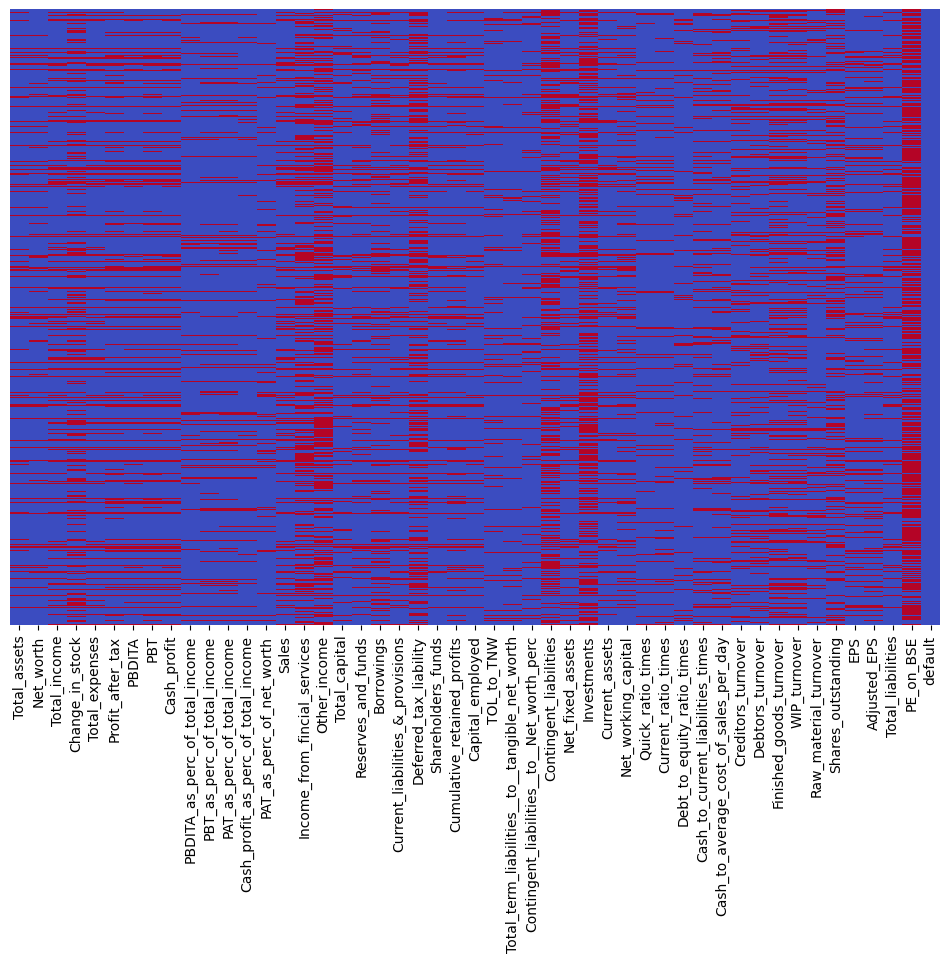

In [64]:
plt.figure(figsize = (12,8))
sns.heatmap(d_sub1.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

In [65]:
d_sub1_temp = d_sub1[d_sub1.isnull().sum(axis = 1) <= 5]

In [66]:
d_sub1_temp.shape

(1657, 49)

In [67]:
d_sub1_temp['default'].value_counts()

default
0    1367
1     290
Name: count, dtype: int64

In [68]:
d_sub1['default'].value_counts()

default
0    3352
1     904
Name: count, dtype: int64

In [69]:
290/904

0.32079646017699115

If we consider availability of features for deciding the observations to be considered, we will end up nearly 70% of the actual defaulters.

In [70]:
d_sub1.isnull().sum().sort_values(ascending = False)/d_sub1.index.size

PE_on_BSE                                        0.67
Investments                                      0.51
Other_income                                     0.46
Contingent_liabilities                           0.42
Deferred_tax_liability                           0.42
Income_from_fincial_services                     0.38
Change_in_stock                                  0.31
Shares_outstanding                               0.30
Finished_goods_turnover                          0.30
WIP_turnover                                     0.27
Borrowings                                       0.23
Profit_after_tax                                 0.20
PBT                                              0.20
Net_working_capital                              0.20
Creditors_turnover                               0.20
Sales                                            0.19
Debtors_turnover                                 0.19
Cash_profit                                      0.18
Cumulative_retained_profits 

#### Dropping columns with more than 30% missing values¶

In [71]:
d_sub2 = d_sub1.drop(['PE_on_BSE', 'Investments', 'Other_income',
                      'Contingent_liabilities', 'Deferred_tax_liability', 
                      'Income_from_fincial_services','Change_in_stock'],
                           axis = 1)

In [72]:
d_sub2.shape

(4256, 42)

In [73]:
d_sub2['default'].value_counts()

default
0    3352
1     904
Name: count, dtype: int64

In [74]:
predictors = d_sub2.drop('default', axis = 1)
response = d_sub2['default']

### Data Split

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictors, response, 
                                                    test_size = 0.3, random_state = 2)

### Null value Imputation

In [76]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

In [77]:
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

### Data Scaling

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [79]:
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [80]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

### Over-Sampling the Data

In [81]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE(random_state=33)
X_res, y_res = smote.fit_resample(X_train_scaled_df, y_train)

In [82]:
X_train = X_res
X_test = X_test_scaled_df
y_train = y_res

## Model Building

Metric of Choice: Recall

High Recall ensures capturing all the actual defaulters and reduces the chance of financially unstable companies as stable. Missing actual defaulters can lead to poor and incorrect investments or lending decisions. 


In [83]:
def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    y_pred = model.predict(predictors)

    if len(list(set(y_pred))) != 2:
        y_prob_pred = model.predict(predictors)

        y_pred=[]
        for i in range(0,len(y_prob_pred)):
            if np.array(y_prob_pred)[i] > threshold:
                a=1
            else:
                a=0
            y_pred.append(a)
    else:
        pass

    acc = accuracy_score(target, y_pred)  # to compute Accuracy
    recall = recall_score(target, y_pred)  # to compute Recall
    precision = precision_score(target, y_pred)  # to compute Precision
    f1 = f1_score(target, y_pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf


def model_confusion_matrix(model, predictors, target, threshold = 0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    if len(list(set(y_pred))) != 2:
        y_prob_pred = model.predict(predictors)

        y_pred=[]
        for i in range(0,len(y_prob_pred)):
            if np.array(y_prob_pred)[i] > threshold:
                a=1
            else:
                a=0
            y_pred.append(a)
    else:
        pass

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Logistic Regression

In [84]:
import statsmodels.api as sm

# Adding constant to training data
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

Logisitc_reg_ = sm.Logit(y_train, X_train_sm).fit()

Optimization terminated successfully.
         Current function value: 0.674660
         Iterations 8


In [85]:
print(Logisitc_reg_.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 4704
Model:                          Logit   Df Residuals:                     4663
Method:                           MLE   Df Model:                           40
Date:                Sun, 11 May 2025   Pseudo R-squ.:                 0.02667
Time:                        22:59:34   Log-Likelihood:                -3173.6
converged:                       True   LL-Null:                       -3260.6
Covariance Type:            nonrobust   LLR p-value:                 1.257e-18
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.0441      0.030     -1.473      0.141      -0.103       0.015
Total_assets           

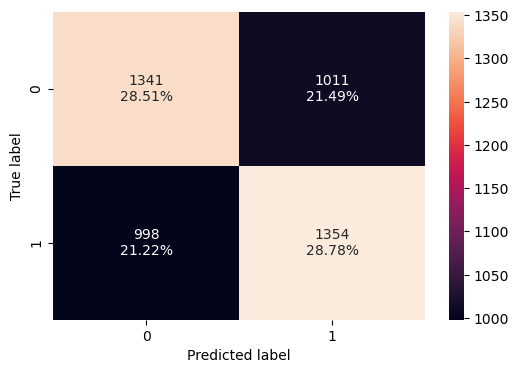

In [86]:
model_confusion_matrix(Logisitc_reg_,X_train_sm, y_train)

In [87]:
print("Training Set Performance")
logistic_regression_perf_train = model_performance_classification(Logisitc_reg_,X_train_sm, y_train)
logistic_regression_perf_train

Training Set Performance


,Accuracy,Recall,Precision,F1
0,0.57,0.58,0.57,0.57


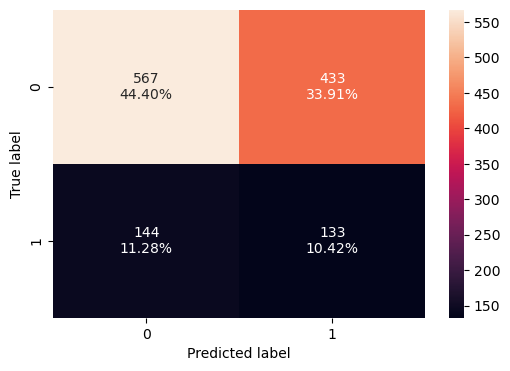

In [88]:
model_confusion_matrix(Logisitc_reg_,X_test_sm, y_test)

In [89]:
print("Test Set Performance")
logistic_regression_perf_test = model_performance_classification(Logisitc_reg_,X_test_sm, y_test)
logistic_regression_perf_test

Test Set Performance


,Accuracy,Recall,Precision,F1
0,0.55,0.48,0.23,0.32


### Random Forest Classifier

In [90]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_model = rf_classifier.fit(X_train, y_train) 

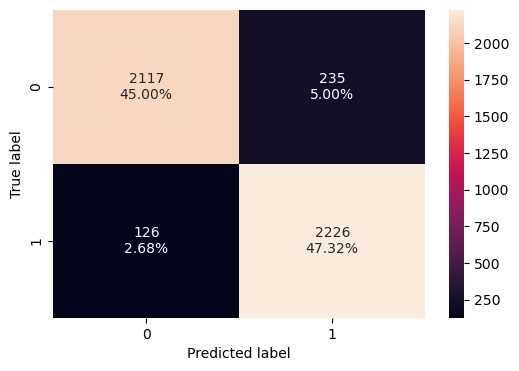

In [91]:
model_confusion_matrix(rf_model, X_train, y_train)

In [92]:
print("Training Set Performance")
random_forest_perf_train = model_performance_classification(rf_model, X_train, y_train)
random_forest_perf_train

Training Set Performance


,Accuracy,Recall,Precision,F1
0,0.92,0.95,0.90,0.92


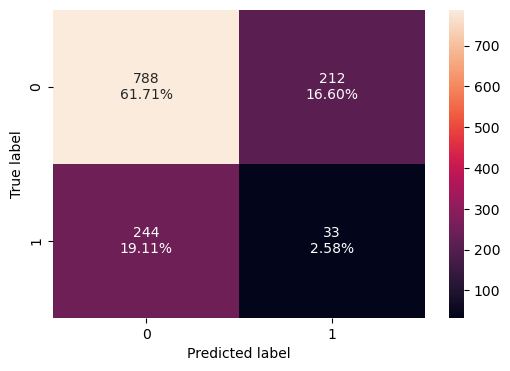

In [93]:
model_confusion_matrix(rf_model, X_test, y_test)

In [94]:
print("Test Set Performance")
random_forest_perf_test = model_performance_classification(rf_model, X_test, y_test)
random_forest_perf_test

Test Set Performance


,Accuracy,Recall,Precision,F1
0,0.64,0.12,0.13,0.13


## Model Performance Improvement

### Logistic Regression

In [95]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(X_train).sort_values(by = 'VIF', ascending = False)

,variables,VIF
0,Total_assets,inf
40,Total_liabilities,inf
13,Sales,119.43
2,Total_income,115.48
3,Total_expenses,53.93
18,Shareholders_funds,32.26
1,Net_worth,30.34
20,Capital_employed,22.73
4,Profit_after_tax,10.91
6,PBT,10.35


In [96]:
X_train_sel = X_train.drop('Total_assets', axis = 1)
calc_vif(X_train_sel).sort_values(by = 'VIF', ascending = False)

,variables,VIF
12,Sales,119.43
1,Total_income,115.48
2,Total_expenses,53.93
17,Shareholders_funds,32.26
0,Net_worth,30.34
19,Capital_employed,22.73
39,Total_liabilities,17.28
3,Profit_after_tax,10.91
5,PBT,10.35
8,PBT_as_perc_of_total_income,10.21


In [97]:
X_train_sel = X_train_sel.drop('Sales', axis = 1)
calc_vif(X_train_sel).sort_values(by = 'VIF', ascending = False)

,variables,VIF
1,Total_income,48.61
2,Total_expenses,46.66
16,Shareholders_funds,32.07
0,Net_worth,30.22
18,Capital_employed,22.68
38,Total_liabilities,17.28
3,Profit_after_tax,10.87
5,PBT,10.35
8,PBT_as_perc_of_total_income,10.20
9,PAT_as_perc_of_total_income,8.36


In [98]:
X_train_sel = X_train_sel.drop('Total_income', axis = 1)
calc_vif(X_train_sel).sort_values(by = 'VIF', ascending = False)

,variables,VIF
15,Shareholders_funds,31.94
0,Net_worth,30.04
17,Capital_employed,22.68
37,Total_liabilities,17.28
2,Profit_after_tax,10.82
4,PBT,10.29
7,PBT_as_perc_of_total_income,10.20
8,PAT_as_perc_of_total_income,8.35
22,Current_assets,6.90
9,Cash_profit_as_perc_of_total_income,6.70


In [99]:
X_train_sel = X_train_sel.drop('Shareholders_funds', axis = 1)
calc_vif(X_train_sel).sort_values(by = 'VIF', ascending = False)

,variables,VIF
16,Capital_employed,21.70
36,Total_liabilities,17.27
2,Profit_after_tax,10.77
4,PBT,10.27
7,PBT_as_perc_of_total_income,10.19
0,Net_worth,9.63
8,PAT_as_perc_of_total_income,8.34
21,Current_assets,6.90
9,Cash_profit_as_perc_of_total_income,6.70
1,Total_expenses,5.94


In [100]:
X_train_sel = X_train_sel.drop('Capital_employed', axis = 1)
calc_vif(X_train_sel).sort_values(by = 'VIF', ascending = False)

,variables,VIF
2,Profit_after_tax,10.67
4,PBT,10.22
7,PBT_as_perc_of_total_income,10.19
0,Net_worth,8.43
8,PAT_as_perc_of_total_income,8.34
35,Total_liabilities,7.87
20,Current_assets,6.76
9,Cash_profit_as_perc_of_total_income,6.70
1,Total_expenses,5.92
6,PBDITA_as_perc_of_total_income,5.86


In [101]:
X_train_sel = X_train_sel.drop('Profit_after_tax', axis = 1)
calc_vif(X_train_sel).sort_values(by = 'VIF', ascending = False)

,variables,VIF
6,PBT_as_perc_of_total_income,10.14
0,Net_worth,8.42
7,PAT_as_perc_of_total_income,8.18
34,Total_liabilities,7.86
19,Current_assets,6.75
8,Cash_profit_as_perc_of_total_income,6.65
1,Total_expenses,5.91
5,PBDITA_as_perc_of_total_income,5.85
13,Current_liabilities_&_provisions,5.32
4,Cash_profit,5.04


In [102]:
X_train_sel = X_train_sel.drop('PBT_as_perc_of_total_income', axis = 1)
calc_vif(X_train_sel).sort_values(by = 'VIF', ascending = False)

,variables,VIF
0,Net_worth,8.41
33,Total_liabilities,7.85
18,Current_assets,6.75
7,Cash_profit_as_perc_of_total_income,6.59
1,Total_expenses,5.90
5,PBDITA_as_perc_of_total_income,5.46
12,Current_liabilities_&_provisions,5.31
4,Cash_profit,5.04
10,Reserves_and_funds,4.46
6,PAT_as_perc_of_total_income,4.21


In [103]:
selected_columns = X_train_sel.columns
X_test_sel = X_test[selected_columns]

X_train_const = sm.add_constant(X_train_sel)
X_test_const = sm.add_constant(X_test_sel)

logit_model_VIF = sm.Logit(y_train, X_train_const).fit()
print(logit_model_VIF.summary())

Optimization terminated successfully.
         Current function value: 0.677792
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 4704
Model:                          Logit   Df Residuals:                     4669
Method:                           MLE   Df Model:                           34
Date:                Sun, 11 May 2025   Pseudo R-squ.:                 0.02215
Time:                        22:59:42   Log-Likelihood:                -3188.3
converged:                       True   LL-Null:                       -3260.6
Covariance Type:            nonrobust   LLR p-value:                 1.431e-15
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                               

In [104]:
logit_y_pred = logit_model_VIF.predict(X_train_const)
fpr, tpr, thresholds = roc_curve(y_train, logit_y_pred)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_logit = round(thresholds[optimal_idx], 3)
optimal_threshold_logit

0.492

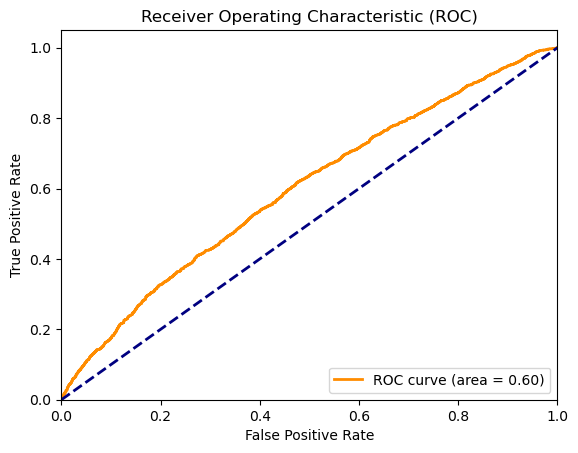

In [105]:
roc_auc = roc_auc_score(y_train, logit_y_pred) 

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

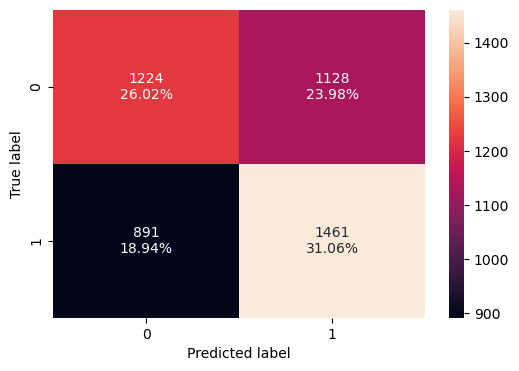

In [106]:
model_confusion_matrix(logit_model_VIF, X_train_const, y_train, optimal_threshold_logit)

In [107]:
print("Training Set Performance")
logistic_regression_tuned_perf_train = model_performance_classification(
    logit_model_VIF, X_train_const, y_train, optimal_threshold_logit)
logistic_regression_tuned_perf_train

Training Set Performance


,Accuracy,Recall,Precision,F1
0,0.57,0.62,0.56,0.59


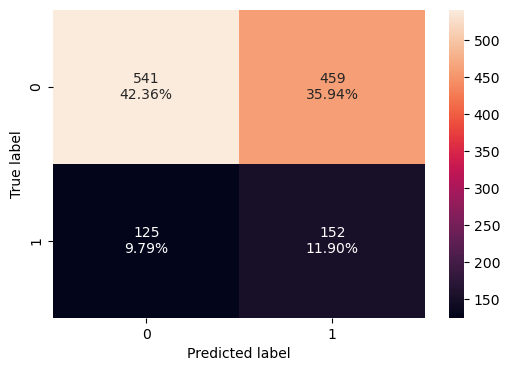

In [108]:
model_confusion_matrix(logit_model_VIF, X_test_const, y_test, optimal_threshold_logit)

In [109]:
print("Test Set Performance")
logistic_regression_tuned_perf_test = model_performance_classification(
    logit_model_VIF, X_test_const, y_test, optimal_threshold_logit)
logistic_regression_tuned_perf_test

Test Set Performance


,Accuracy,Recall,Precision,F1
0,0.54,0.55,0.25,0.34


### Random Forest Classifier (Hyper-parameter Tuning)

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'n_estimators': [10, 25, 50, 60, 75, 80, 100, 150, 200],  
    'max_depth': np.linspace(1,10, num=2, dtype=int).tolist(),        
    'min_samples_split': np.linspace(1, 10, num=5, dtype=int).tolist(),
    'min_samples_leaf': np.linspace(1, 10, num=5, dtype=int).tolist()
}

rfcl = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rfcl,
    param_distributions=param_dist,
    n_iter=200,
    scoring=metrics.make_scorer(metrics.recall_score),
    cv=5,
    random_state=42,
    n_jobs=-1
)


In [111]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'max_depth': [1, 10],
                                        'min_samples_leaf': [1, 3, 5, 7, 10],
                                        'min_samples_split': [1, 3, 5, 7, 10],
                                        'n_estimators': [10, 25, 50, 60, 75, 80,
                                                         100, 150, 200]},
                   random_state=42,
                   scoring=make_scorer(recall_score, response_method='predict'))

In [112]:
random_search.best_params_

{'n_estimators': 75,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [113]:
best_rf_classifier = random_search.best_estimator_

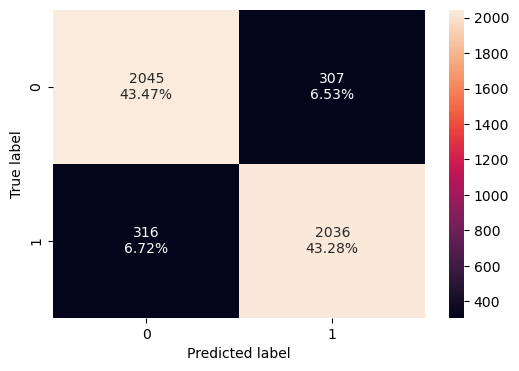

In [114]:
model_confusion_matrix(best_rf_classifier, X_train, y_train)

In [115]:
print("Training Set Performance")
random_forest_tuned_perf_train = model_performance_classification(best_rf_classifier, X_train, y_train)
random_forest_tuned_perf_train

Training Set Performance


,Accuracy,Recall,Precision,F1
0,0.87,0.87,0.87,0.87


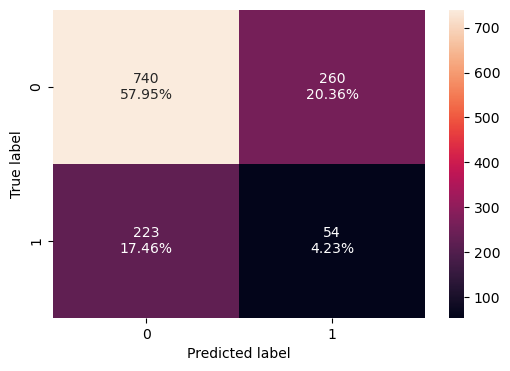

In [116]:
model_confusion_matrix(best_rf_classifier, X_test, y_test)

In [117]:
print("Test Set Performance")
random_forest_tuned_perf_test = model_performance_classification(best_rf_classifier, X_test, y_test)
random_forest_tuned_perf_test

Test Set Performance


,Accuracy,Recall,Precision,F1
0,0.62,0.19,0.17,0.18


## Model Comparison and Final Model Selection

In [118]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        logistic_regression_perf_train.T,
        logistic_regression_tuned_perf_train.T,
        random_forest_perf_train.T,
        random_forest_tuned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Tuned Logistic Regression",
    "Random Forest",
    "Tuned Random Forest",
]
print("Training performance")
models_train_comp_df.T

Training performance


,Accuracy,Recall,Precision,F1
Logistic Regression,0.57,0.58,0.57,0.57
Tuned Logistic Regression,0.57,0.62,0.56,0.59
Random Forest,0.92,0.95,0.90,0.92
Tuned Random Forest,0.87,0.87,0.87,0.87


In [119]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        logistic_regression_perf_test.T,
        logistic_regression_tuned_perf_test.T,
        random_forest_perf_test.T,
        random_forest_tuned_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression",
    "Tuned Logistic Regression",
    "Random Forest",
    "Tuned Random Forest",
]
print("Testing performance:")
models_test_comp_df.T

Testing performance:


,Accuracy,Recall,Precision,F1
Logistic Regression,0.55,0.48,0.23,0.32
Tuned Logistic Regression,0.54,0.55,0.25,0.34
Random Forest,0.64,0.12,0.13,0.13
Tuned Random Forest,0.62,0.19,0.17,0.18


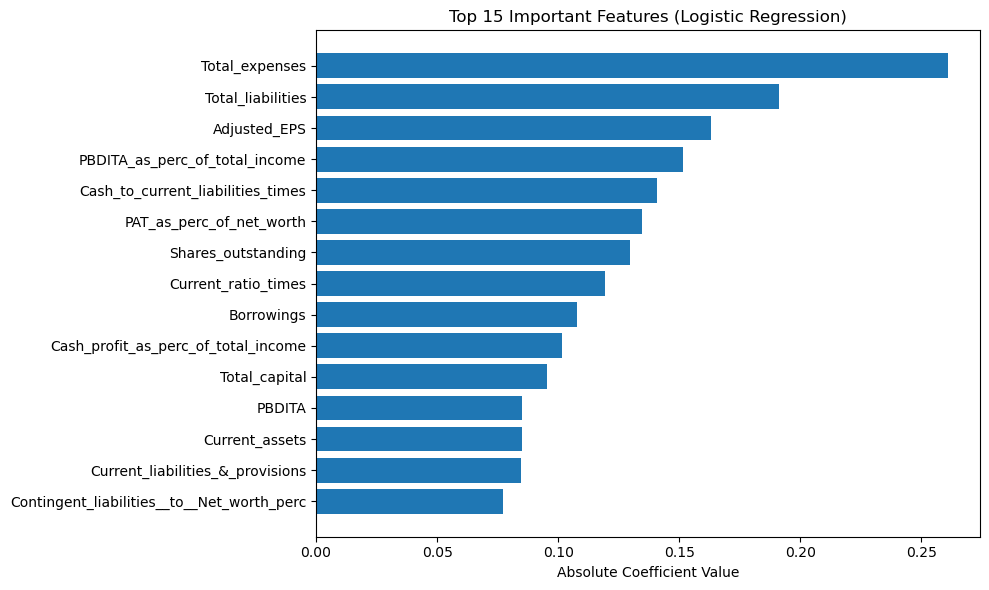

In [120]:
coefficients = logit_model_VIF.params
abs_coefficients = np.abs(coefficients)

# Get top 15 features
top_10 = abs_coefficients.sort_values(ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_10.index, top_10.values)
plt.xlabel("Absolute Coefficient Value")
plt.title("Top 15 Important Features (Logistic Regression)")
plt.gca().invert_yaxis()  # Highest at the top
plt.tight_layout()
plt.show()